# Math 248 Lab

*November 2nd, 2023$

**Examples**

- Finding minimum of $f(x) = x\log x$

- Integral function
$$y = \sin^{2}{\left(x \right)}$$
$$y' = 2 \sin{\left(x \right)} \cos{\left(x \right)}$$
$$ t = \operatorname{acos}{\left(x \right)}$$
$$Y = \int_0^t \sin^{2}{\left(x \right)} \, dx = \frac{x \sqrt{1 - x^{2}}}{2} + \frac{\operatorname{acos}{\left(x \right)}}{2}$$
$$Y ' = \frac{x^{2}}{2 \sqrt{1 - x^{2}}} - \frac{\sqrt{1 - x^{2}}}{2} - \frac{1}{2 \sqrt{1 - x^{2}}}$$
$$= - \sqrt{1 - x^{2}}$$

**Problem**
Use SymPy to investigate the *normal distribution* mu sigma

$$
N(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \left(\frac{x-\mu}{2\sigma}\right)^2}
$$

In [1]:
import sympy as sp

from sympy.abc import x

f = x*sp.log(x)

df = sp.diff(f, x)
ddf = sp.diff(df, x)

display(f, df, ddf)

x*log(x)

log(x) + 1

1/x

In [2]:
sp.solve(df, x)

[exp(-1)]

In [3]:
ddf.subs({x: sp.solve(df, x)[0]})

E

$$\frac{d^2f}{dx^2} > 0$$

so the function is concave up and the critical point is a minimum.

In [24]:
t = sp.acos(x)
y = sp.sin(x)**2
dy = sp.diff(y, x)

In [25]:
display(y, t, dy)

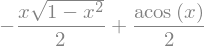

In [26]:
Y = sp.integrate(y, (x, 0, t))

Y

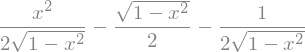

In [29]:
Y_prime = sp.diff(Y, x)

Y_prime

In [30]:
sp.print_latex(Y_prime)

\frac{x^{2}}{2 \sqrt{1 - x^{2}}} - \frac{\sqrt{1 - x^{2}}}{2} - \frac{1}{2 \sqrt{1 - x^{2}}}


In [23]:
Y_prime = sp.simplify(sp.diff(Y, x))

Y_prime

In [9]:
for expr in [y, t, dy, Y, Y_prime]:
    sp.print_latex(expr)

\sin^{2}{\left(x \right)}
\operatorname{acos}{\left(x \right)}
2 \sin{\left(x \right)} \cos{\left(x \right)}
- \frac{x \sqrt{1 - x^{2}}}{2} + \frac{\operatorname{acos}{\left(x \right)}}{2}
- \sqrt{1 - x^{2}}


# Plotting Your SymPy Expressions

define lambda functions

In [10]:
f_lambda = sp.lambdify(x, f, 'numpy')
df_lambda = sp.lambdify(x, df, 'numpy')
ddf_lambda = sp.lambdify(x, ddf, 'numpy')

y_lambda = sp.lambdify(x, y, 'numpy')
dy_lambda = sp.lambdify(x, dy, 'numpy')
t_lambda = sp.lambdify(x, t, 'numpy')

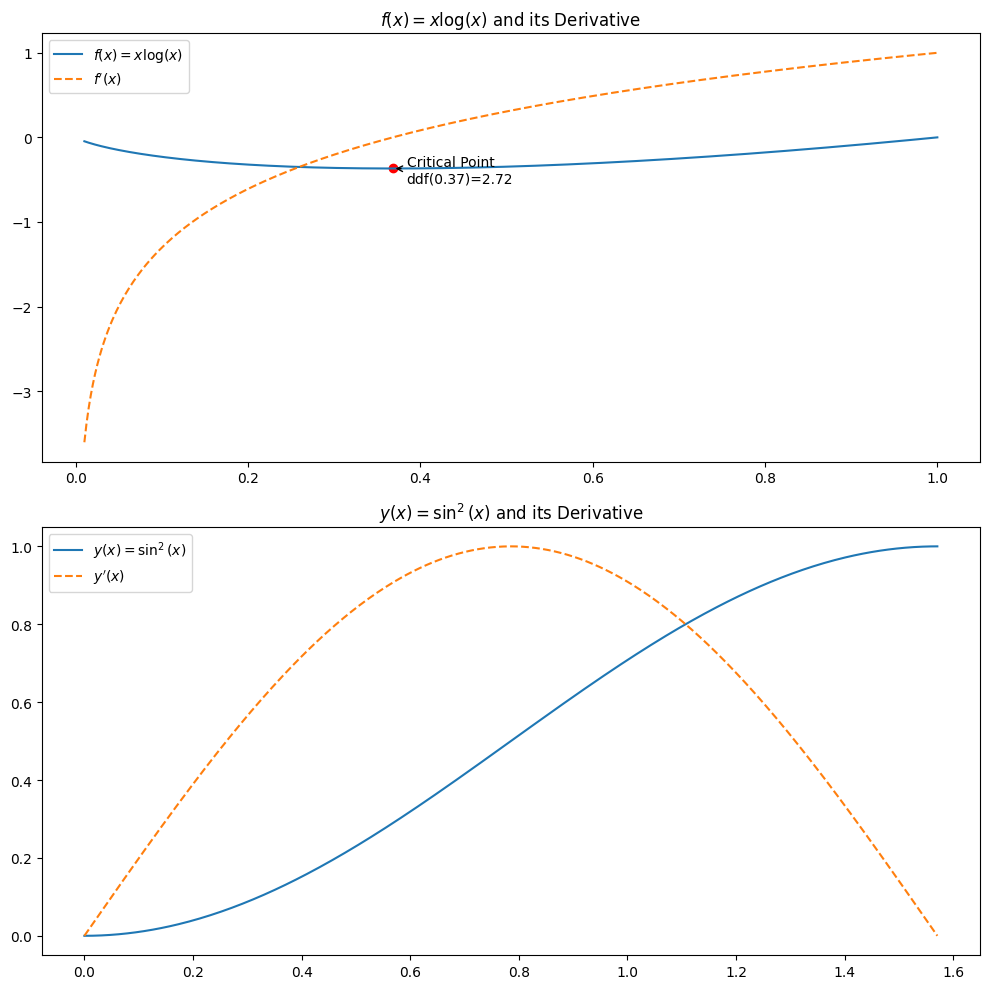

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values for y(x)
x_vals = np.linspace(0.01, 1, 400)
x_vals_y = np.linspace(0, np.pi/2, 400)

# Plotting again
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Computing critical points
critical_points = sp.solve(df, x)

# Computing second derivative values at critical points
second_derivative_values = [ddf_lambda(point) for point in critical_points]

# Converting critical points to float
cp = [float(point) for point in critical_points]

# Computing f(critical points)
f_crit = [f_lambda(np.array([point]))[0] for point in cp]

# Plot f(x) and its derivative
ax[0].plot(x_vals, f_lambda(x_vals), label='$f(x)=x \log(x)$')
ax[0].plot(x_vals, df_lambda(x_vals), label="$f\'(x)$", linestyle='--')
ax[0].scatter(cp, f_crit, color='red')  # Critical points
for i, point in enumerate(cp):
    ax[0].annotate(f'Critical Point\nddf({point:.2f})={second_derivative_values[i]:.2f}', 
                   (point, f_crit[i]), xytext=(10,-10), 
                   textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Plot y(x) and its derivative
ax[1].plot(x_vals_y, y_lambda(x_vals_y), label='$y(x)=\sin^2(x)$')
ax[1].plot(x_vals_y, dy_lambda(x_vals_y), label="$y'(x)$", linestyle='--')

# Labels, titles and legends
ax[0].set_title('$f(x) = x \log(x)$ and its Derivative')
ax[0].legend()
ax[1].set_title('$y(x) = \sin^2(x)$ and its Derivative')
ax[1].legend()
plt.tight_layout()
plt.show()

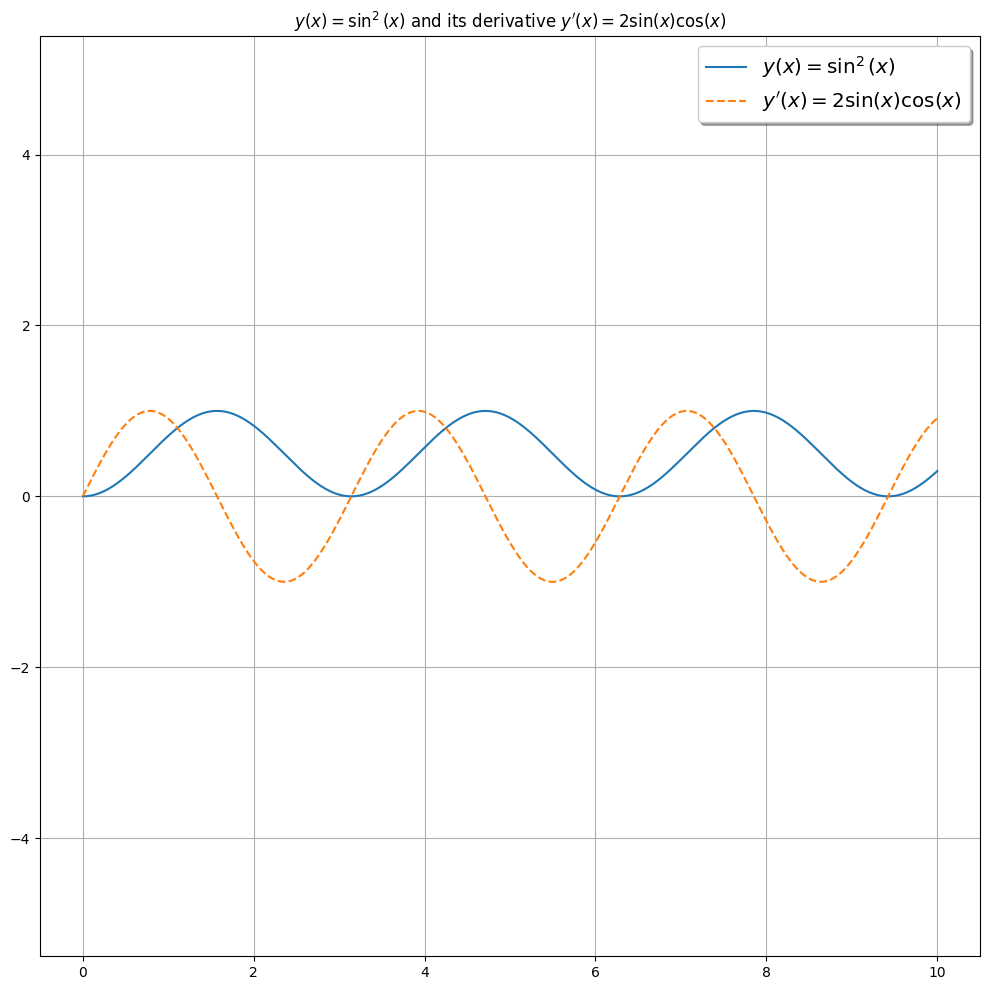

In [12]:
x_vals_y = np.linspace(0, 10, 400)

plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.grid()
plt.plot(x_vals_y, y_lambda(x_vals_y), label='$y(x)=\sin^2(x)$')
plt.plot(x_vals_y, dy_lambda(x_vals_y), label="$y'(x)=2\sin(x)\cos(x)$", linestyle='--')

plt.title('$y(x) = \sin^2(x)$ and its derivative $y\'(x)=2\sin(x)\cos(x)$')
plt.legend(shadow=True, fontsize='x-large')
plt.tight_layout()
plt.show()


In [13]:
import sympy as sp
from sympy.abc import x, mu, sigma
import numpy as np

N = (1/(sp.sqrt(2*sp.pi)*sigma))*sp.exp(-(x-mu)**2 / (2*sigma**2))

N

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

In [14]:
sp.integrate(N, (x, -sp.oo, sp.oo))

Piecewise((1, ((Abs(arg(sigma)) < pi/4) | ((Abs(arg(sigma)) <= pi/4) & (Abs(2*arg(mu) - 4*arg(sigma)) < pi)) | ((Abs(arg(sigma)) < pi/4) & (Abs(2*arg(mu) - 4*arg(sigma)) <= pi)) | ((Abs(arg(sigma)) < pi/4) & (Abs(2*arg(mu) - 4*arg(sigma)) < pi))) & ((Abs(arg(sigma)) < pi/4) | ((Abs(arg(sigma)) <= pi/4) & (Abs(2*arg(mu) - 4*arg(sigma) + 2*pi) < pi)) | ((Abs(arg(sigma)) < pi/4) & (Abs(2*arg(mu) - 4*arg(sigma) + 2*pi) <= pi)) | ((Abs(arg(sigma)) < pi/4) & (Abs(2*arg(mu) - 4*arg(sigma) + 2*pi) < pi)))), (Integral(sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma), (x, -oo, oo)), True))

not what we want. have to set assumptions on $x, \mu, \sigma$

In [15]:
x = sp.Symbol("x", real=True)
sigma = sp.Symbol("sigma", positive=True)
mu = sp.Symbol("mu", real=True)


N = (1/(sp.sqrt(2*sp.pi)*sigma))*sp.exp(-(x-mu)**2 / (2*sigma**2))

sp.integrate(N, (x, -sp.oo, sp.oo))

first_moment = sp.integrate(N*x, (x, -sp.oo, sp.oo))
second_moment = sp.integrate(N*x**2, (x, -sp.oo, sp.oo))
third_moment = sp.integrate(N*x**3, (x, -sp.oo, sp.oo))
variance = second_moment - first_moment**2

display(N, first_moment, second_moment, variance, third_moment, (third_moment**2).expand())

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

mu

mu**2 + sigma**2

sigma**2

mu**3 + 3*mu*sigma**2

mu**6 + 6*mu**4*sigma**2 + 9*mu**2*sigma**4

In [16]:
sp.print_latex(N)

\frac{\sqrt{2} e^{- \frac{\left(- \mu + x\right)^{2}}{2 \sigma^{2}}}}{2 \sqrt{\pi} \sigma}


$N(x) = \frac{\sqrt{2} e^{- \frac{\left(- \mu + x\right)^{2}}{2 \sigma^{2}}}}{2 \sqrt{\pi} \sigma}$

First moment = $\int_{\mathbb{R}} x N(x) dx = \mu $

Second moment = $\int_{\mathbb{R}} x^2 N(x) dx = \mu^2 + \sigma^2$

Variance =  $\sigma^2$

In [17]:
dN = sp.diff(N, x)

dN

-sqrt(2)*(-2*mu + 2*x)*exp(-(-mu + x)**2/(2*sigma**2))/(4*sqrt(pi)*sigma**3)

In [18]:
sp.solve(dN, x)

[mu]

In [19]:
sp.init_printing()

In [20]:
sp.solve(dN, x)